**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations of signals, specially the spectrograms.

In [4]:
!git clone https://github.com/pzinemanas/sis1lab.git

import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

from sis1lab.util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

fatal: destination path 'sis1lab' already exists and is not an empty directory.


First upload your reference signal and plot the first seconds of it.

In [5]:
!git clone https://github.com/pzinemanas/sis1lab.git

t_start = 0
t_end = 3
!git clone https://github.com/EnricMM0/sis1_group1.git
filepath = "./sis1_group1/psalterium-a4-plucked.wav"
ref, fs = load_audio(filepath)
plot_signals( ref, fs, t_start,t_end)

Output hidden; open in https://colab.research.google.com to view.

# **Exercises**

**1. Spectrograms**

A spectrogram is obtained by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

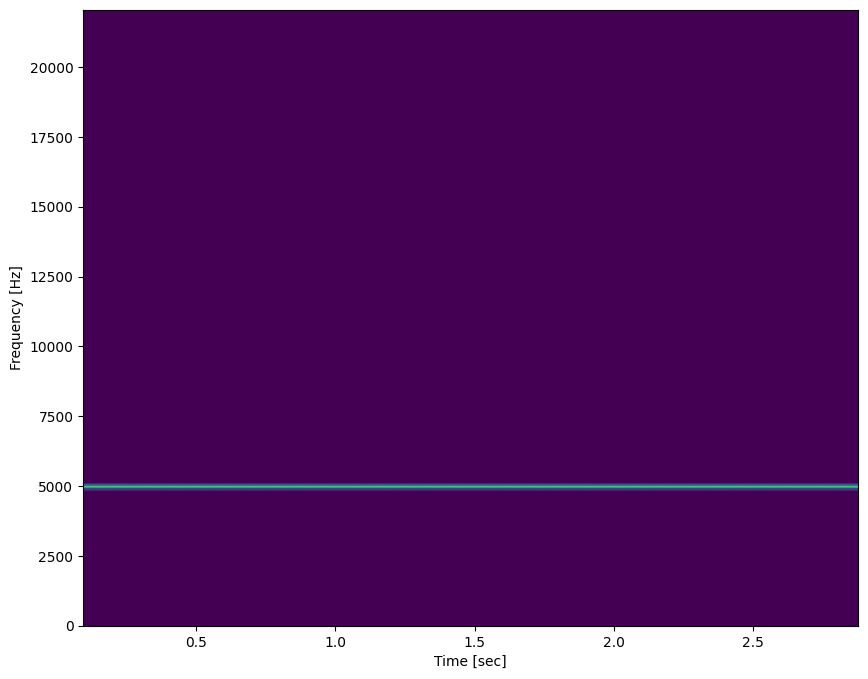

In [6]:
from scipy import signal

#define signal
A = 0.8
f0 = 5000.0
phi = np.pi/2
fs = 44100
t = np.arange(0, 3, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t + phi)

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(x, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.show()

We can plot the spectrum (one slice of the spectrogram) of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [7]:
plot_spectrum_at(ff, tt, S, 0.5)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the frequency region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


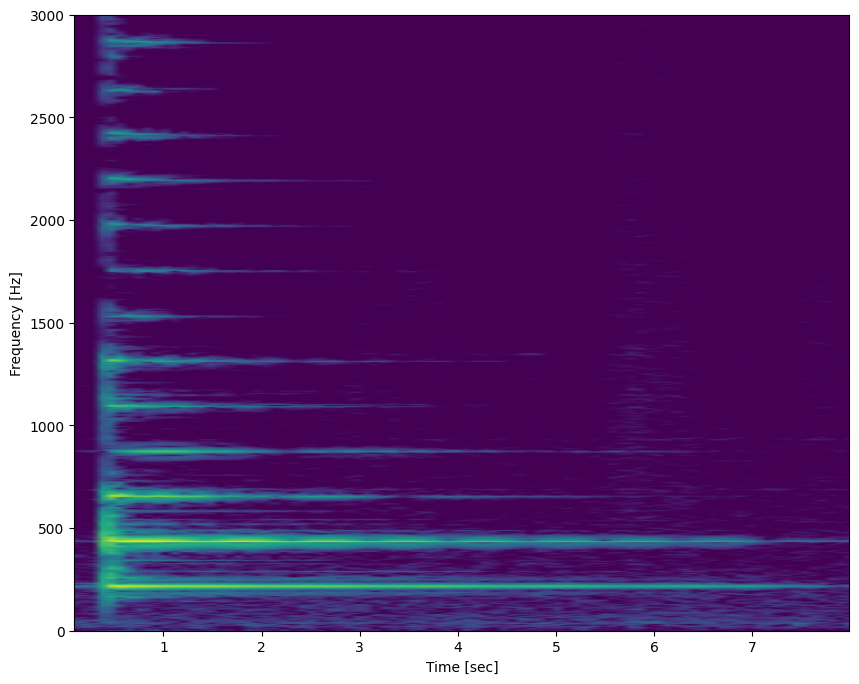

In [9]:
# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.ylim([0,3000])
plt.show()

1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [49]:
plot_spectrum_at(ff, tt, S, 1)

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [50]:
weights = [0.2,0.0198,0.0011,0.0024,0.00374,0.00032] # Fill this list with the measured weights

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [17]:
def synthesize(f0, phi, Ak, t):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [51]:
f0 = 440
T = 1/f0
phi = -np.pi/4
t_start = 0.443
t_end = 0.443+T*3
x = synthesize(f0,phi,weights,t)
plot_signals([x, ref], fs,t_start,t_end)


2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [53]:
ff, tt, S_ref = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)
ff, tt, S_synt = signal.spectrogram(x, fs, nperseg=window_length, noverlap=window_length/2)
plot_spectrum_at(ff, tt, [S_ref,S_synt], 1)

2.3. Compare the spectrograms of the two signals. What are the main differences?

In [ ]:
#El soroll de referència té un subharmonic aprop de 220Hz, que causa que hi hagi el doble de pics d'harmonics,
#malgrat això, els altres pics coincideixen, i això genera un sò sintetitzat més proper al so de referència que en el últim lab.

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

In [54]:
Audio(ref, rate=fs)

In [55]:
Audio(x,rate=fs)

Es noten les fluctuacions en l'ona del sò original, en el segon, és un sò que varia poc, i gairebé és una nota constant. Això és degut a que no té el mateix rang d'harmònics que el sò original, ni els subharmonics.